<a href="https://www.kaggle.com/code/samithsachidanandan/loan-prediction-analysis-classification?scriptVersionId=231084932" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv
/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv


## Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

## Loading the Dataset 

In [3]:
df_train =pd.read_csv("/kaggle/input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv")
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_train.shape

(614, 13)

In [5]:
df_test  =pd.read_csv("/kaggle/input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv")
df_test .head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
df_test.shape

(367, 12)

In [7]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Preprocessing the Dataset

In [9]:
# Find the null values 
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
def Preprocess (df_train, df_test):
    df = pd.concat([df_train, df_test], axis = 0)
    # Fill the missing values for the numerical terms -mean
    df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
    df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
    df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

    # Fill the missing values for categorical terms -mode
    df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
    df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
    df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
    df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

    # Creating a new attribute
    df['Total_Income'] = df ['ApplicantIncome'] + df['CoapplicantIncome']

    numerical_new = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Total_Income']
    numerical_log =  ['ApplicantIncomeLog', 'CoapplicantIncomeLog', 'LoanAmountLog','Loan_Amount_TermLog','Total_Incomelog']
    # Apply log transformation before the loop
    df[numerical_log] = df[numerical_new].apply(lambda x: np.log(x + 1))  # Adding 1 to avoid log(0) issues
    

    df_train = df[:len(df_train)]
    df_test = df[len(df_train):]

    df_test = df_test.drop('Loan_Status', axis = 1)

    return df_train, df_test


In [11]:
train_df, test_df = Preprocess(df_train, df_test)

In [12]:
train_df.isnull().sum()

Loan_ID                 0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term        0
Credit_History          0
Property_Area           0
Loan_Status             0
Total_Income            0
ApplicantIncomeLog      0
CoapplicantIncomeLog    0
LoanAmountLog           0
Loan_Amount_TermLog     0
Total_Incomelog         0
dtype: int64

## Exploratory Data Analysis

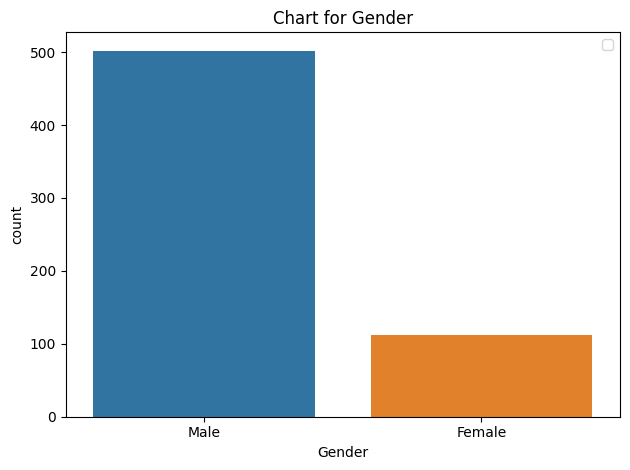

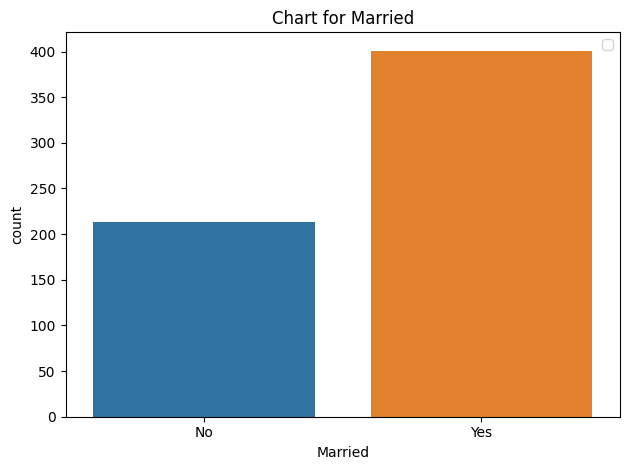

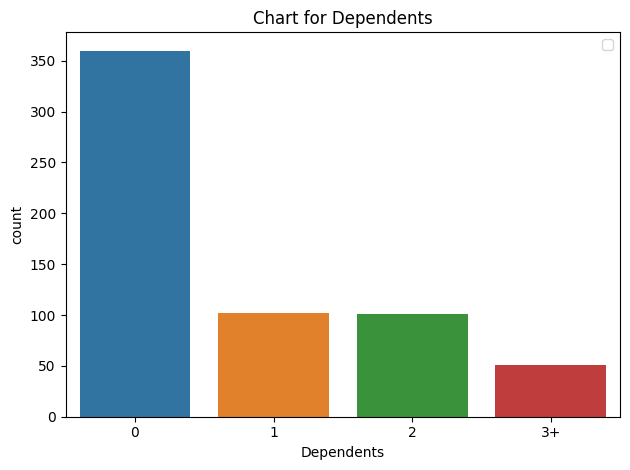

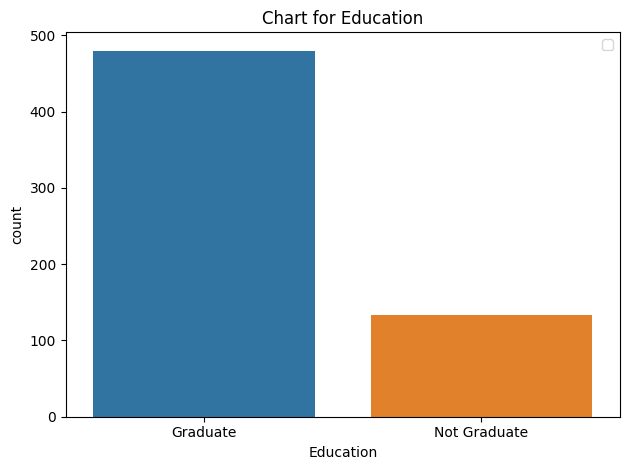

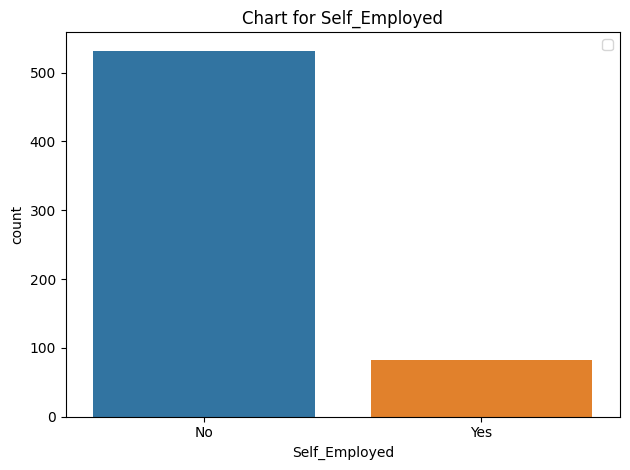

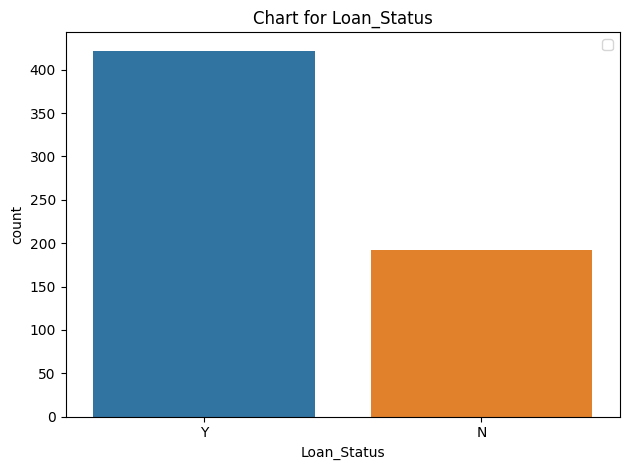

In [13]:
# Categorical Attributes visualization 

categorical = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Status']

for col in categorical:  
    sns.countplot(x=col, data=train_df)
    plt.title(f"Chart for {col}") 
 
    plt.legend()
    plt.tight_layout()
    plt.show()

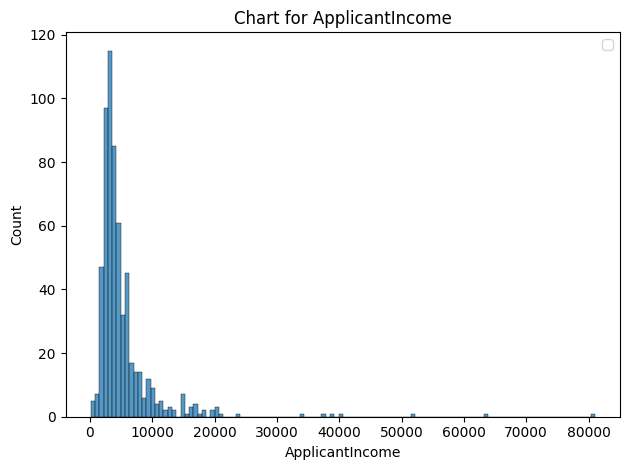

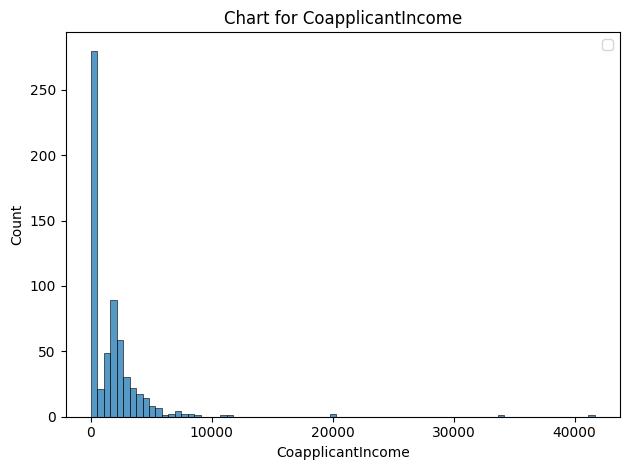

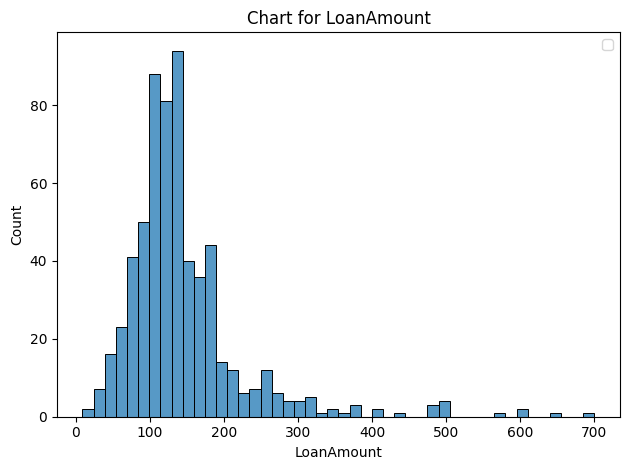

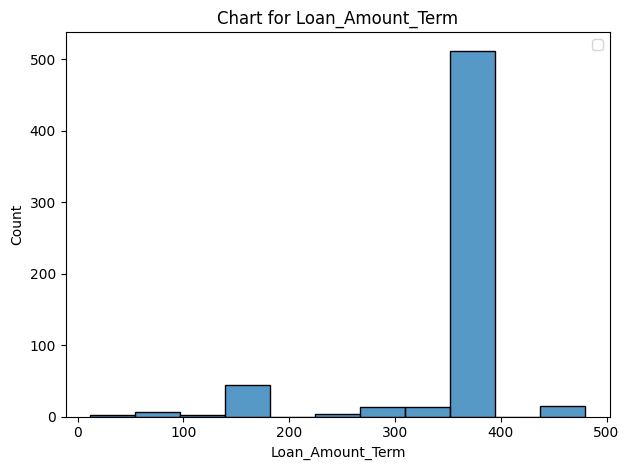

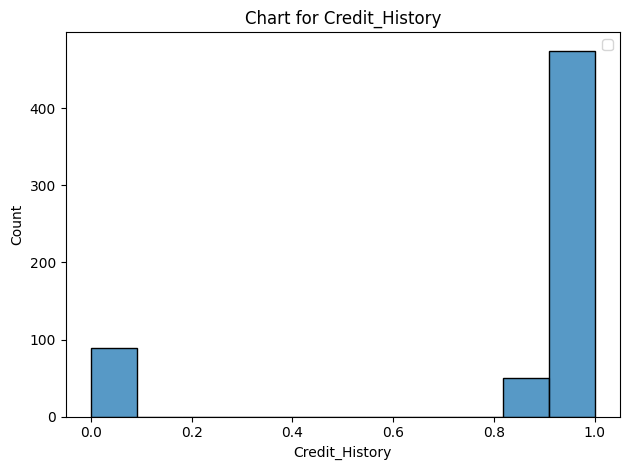

In [14]:
# Numercal Attributes visualization 

numerical = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']

for col in numerical:  
    sns.histplot(x=col, data=train_df)
    plt.title(f"Chart for {col}") 
 
    plt.legend()
    plt.tight_layout()
    plt.show()

## Visualizing the log transforamed attributes

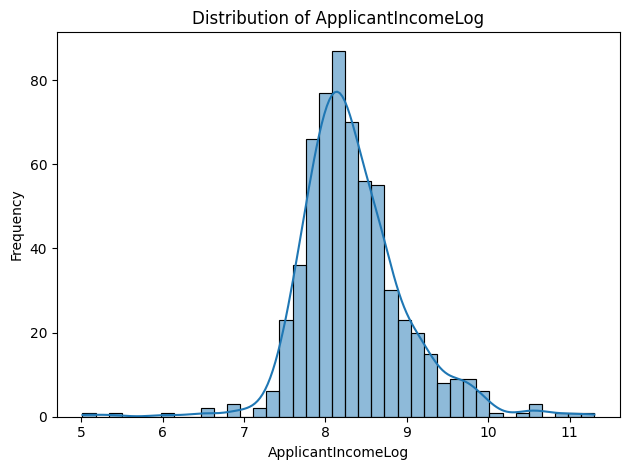

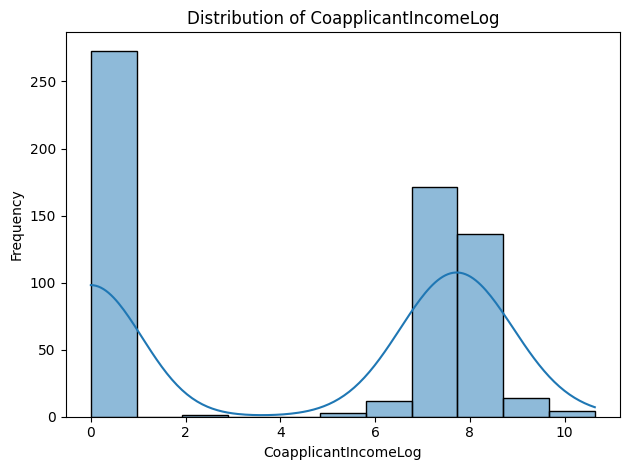

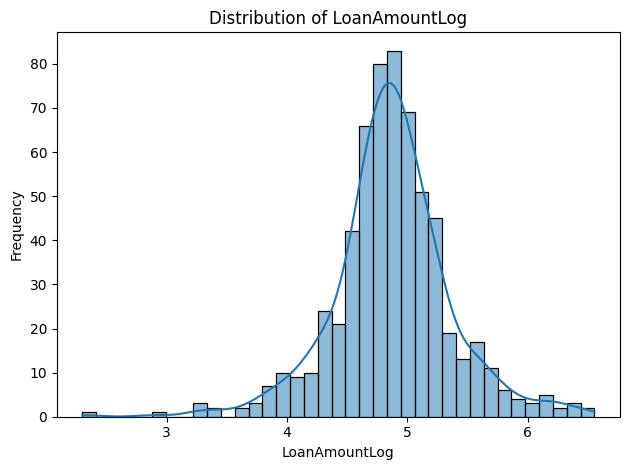

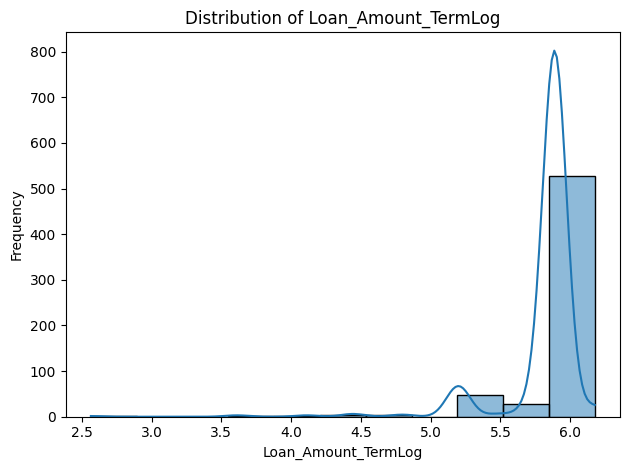

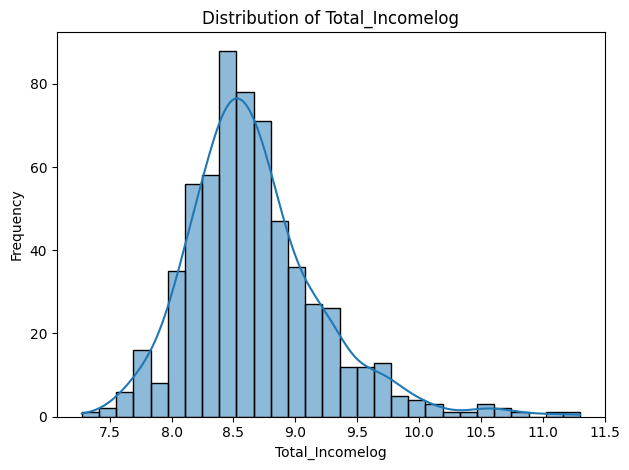

In [15]:

numerical_log =  ['ApplicantIncomeLog', 'CoapplicantIncomeLog', 'LoanAmountLog','Loan_Amount_TermLog','Total_Incomelog']


for col in numerical_log: 
    sns.histplot(train_df[col], kde=True)  
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    plt.tight_layout()  
    plt.show()

## Corelation matrix

<Axes: >

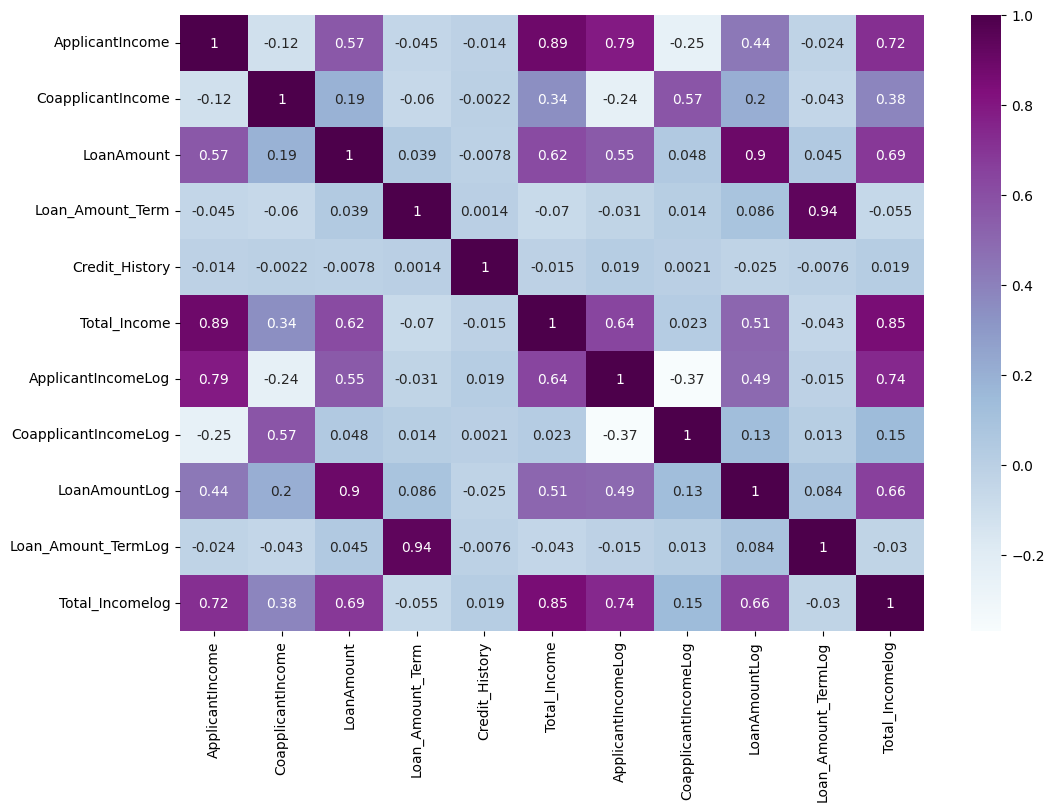

In [16]:
corr = train_df.corr(numeric_only=True)
fig,ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr, annot=True, ax = ax, cmap = 'BuPu')

### Drop unneccessay columns

In [17]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_Incomelog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban,Y,5849.0,8.674197,0.000000,4.966415,5.888878,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural,N,6091.0,8.430327,7.319202,4.859812,5.888878,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban,Y,3000.0,8.006701,0.000000,4.204693,5.888878,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban,Y,4941.0,7.857094,7.765993,4.795791,5.888878,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban,Y,6000.0,8.699681,0.000000,4.955827,5.888878,8.699681


In [18]:
cols = ['Loan_ID','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Total_Income','CoapplicantIncomeLog']
train_df =train_df.drop(columns = cols, axis = 1)
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_Incomelog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.966415,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [19]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_Incomelog
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.00000,Urban,5720.0,8.651899,0.000000,4.709530,5.888878,8.651899
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.00000,Urban,4576.0,8.031710,7.313887,4.844187,5.888878,8.428799
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.00000,Urban,6800.0,8.517393,7.496097,5.342334,5.888878,8.824825
3,LP001035,Male,Yes,2,Graduate,No,2340,2546.0,100.0,360.0,0.83592,Urban,4886.0,7.758333,7.842671,4.615121,5.888878,8.494334
4,LP001051,Male,No,0,Not Graduate,No,3276,0.0,78.0,360.0,1.00000,Urban,3276.0,8.094684,0.000000,4.369448,5.888878,8.094684


In [20]:
cols = ['Loan_ID','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Total_Income','CoapplicantIncomeLog']
test_df =test_df.drop(columns = cols, axis = 1)
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_Incomelog
0,Male,Yes,0,Graduate,No,1.00000,Urban,8.651899,4.709530,5.888878,8.651899
1,Male,Yes,1,Graduate,No,1.00000,Urban,8.031710,4.844187,5.888878,8.428799
2,Male,Yes,2,Graduate,No,1.00000,Urban,8.517393,5.342334,5.888878,8.824825
3,Male,Yes,2,Graduate,No,0.83592,Urban,7.758333,4.615121,5.888878,8.494334
4,Male,No,0,Not Graduate,No,1.00000,Urban,8.094684,4.369448,5.888878,8.094684


In [21]:
 test_df['Loan_Status'] = 0

## Label Encoding 

In [22]:
from sklearn.preprocessing import LabelEncoder
categorical_new = ['Gender', 'Married','Education','Dependents', 'Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for col in categorical_new:
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.fit_transform(test_df[col])

In [23]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_Incomelog
0,1,0,0,0,0,1.0,2,1,8.674197,4.966415,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


In [24]:
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_Incomelog,Loan_Status
0,1,1,0,0,0,1.00000,2,8.651899,4.709530,5.888878,8.651899,0
1,1,1,1,0,0,1.00000,2,8.031710,4.844187,5.888878,8.428799,0
2,1,1,2,0,0,1.00000,2,8.517393,5.342334,5.888878,8.824825,0
3,1,1,2,0,0,0.83592,2,7.758333,4.615121,5.888878,8.494334,0
4,1,0,0,1,0,1.00000,2,8.094684,4.369448,5.888878,8.094684,0


## Train- Test Split 

In [25]:
# Specify input and output attributes 
X = train_df.drop(columns=['Loan_Status'], axis=1)
y = train_df['Loan_Status']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

## Model Training 

In [27]:
# Classify function 
from sklearn.model_selection import cross_val_score
def classify(model, X, y ):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
    model.fit(X_train, y_train)
    print("Accuracy is ", model.score(X_test, y_test)*100)
    #cross validation - it is used for better validation of model 
    #eg: cv-5, train-4 , test-1
    score = cross_val_score(model, X, y, cv=5)
    print("Cross Validation is", np.mean(score)*100)

In [28]:
from sklearn.linear_model import LogisticRegression
logreg  = LogisticRegression()
classify(logreg, X, y)

Accuracy is  77.27272727272727
Cross Validation is 81.10888977742236


In [29]:
from sklearn.tree import DecisionTreeClassifier
dtree  = DecisionTreeClassifier()
classify(dtree , X, y)


Accuracy is  72.07792207792207
Cross Validation is 71.82460349193656


In [30]:
#Xgboost
from xgboost import XGBClassifier 
xgb = XGBClassifier()
classify(xgb, X, y)

Accuracy is  74.67532467532467
Cross Validation is 76.5480474476876


In [31]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

rfc = RandomForestClassifier()
classify(rfc, X, y)

Accuracy is  78.57142857142857
Cross Validation is 78.34332933493269


In [32]:


etc = ExtraTreesClassifier()
classify(etc, X, y)

Accuracy is  75.97402597402598
Cross Validation is 76.7146474743436


### Hyoerparameter Tunning 

In [33]:
rfc_h = RandomForestClassifier(n_estimators=140, min_samples_split=25, max_depth=7, max_features=1)
classify(rfc_h,X,y)

Accuracy is  77.27272727272727
Cross Validation is 80.13194722111156


## Confussion Matrix

In [34]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix (y_test, y_pred)
cm

array([[23, 31],
       [ 3, 97]])

<Axes: >

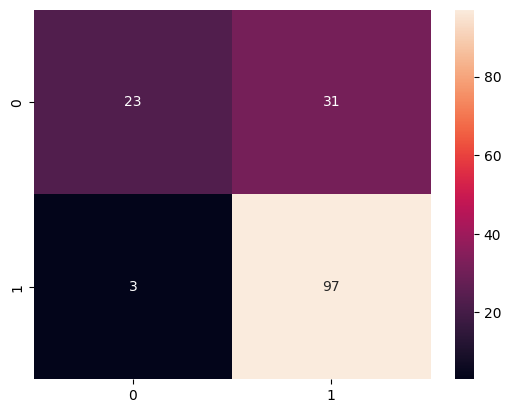

In [36]:
sns.heatmap(cm, annot=True)

In [37]:
test_df = test_df.drop(columns=['Loan_Status'], axis=1)

In [38]:
y_pred = model.predict(test_df)

In [39]:
df_test['Loan_Status'] = y_pred

In [40]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1


In [41]:
df_test['Loan_Status'] = df_test['Loan_Status'].map({1: 'Y', 0: 'N'})

In [42]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y
